Diabetes Prediction using Machine Learning:

Diabetes is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. All patients here are females at least 21 years old of Pima Indian heritage.

Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

Details about the dataset:
The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
Blood Pressure: Diastolic blood pressure (mm Hg)
Skin Thickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
Diabetes Pedigree Function: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
Number of Observation Units: 768

Variable Number: 9

1. Exploratory Data Analysis

In [1]:
#Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,auc,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the dataset
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [6]:
# Descriptive statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
for i in df:
    print(df.groupby("Outcome").agg({i:"mean"}),'\n')

         Pregnancies
Outcome             
0           3.298000
1           4.865672 

            Glucose
Outcome            
0        109.980000
1        141.257463 

         BloodPressure
Outcome               
0            68.184000
1            70.824627 

         SkinThickness
Outcome               
0            19.664000
1            22.164179 

            Insulin
Outcome            
0         68.792000
1        100.335821 

               BMI
Outcome           
0        30.304200
1        35.142537 

         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500 

               Age
Outcome           
0        31.190000
1        37.067164 

         Outcome
Outcome         
0            0.0
1            1.0 



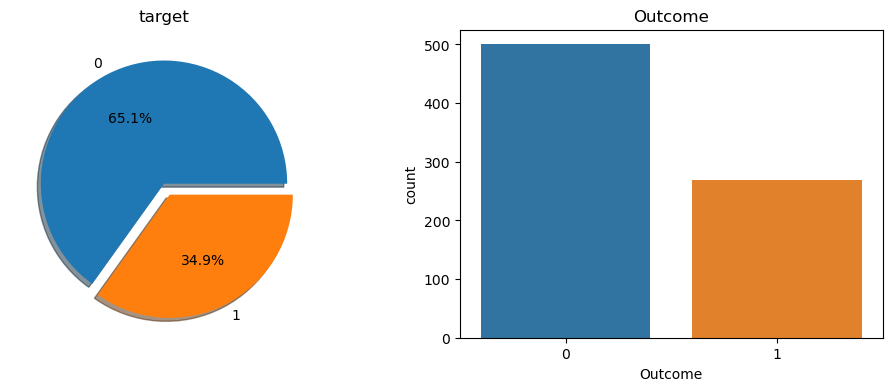

In [8]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(12,4))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=df, x='Outcome')
ax[1].set_title('Outcome')
plt.show()

Text(0.5, 0.98, 'Histograms of each feature')

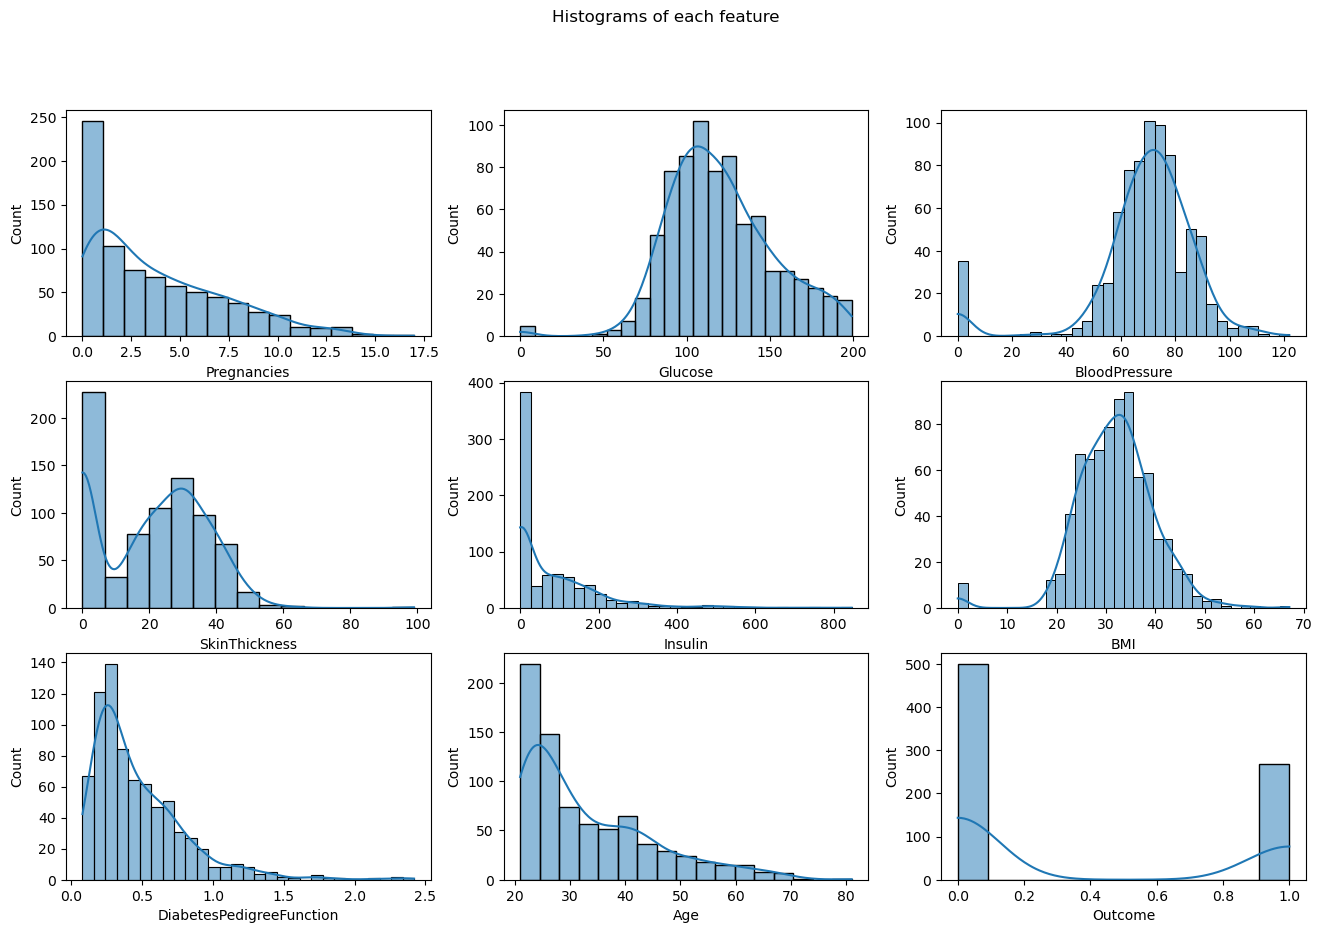

In [9]:
#Histograms of each feature was accessed
k=1
plt.figure(figsize=(16,10))
for i in df.columns:   
    plt.subplot(3,3,k)
    sns.histplot(df[i],kde=True)
    plt.xlabel(i)
    k=k+1
plt.suptitle('Histograms of each feature')

In [10]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables which has considerable correlation to the Outcome dependent variable.
# The variable is Glucose. As these increases, Outcome variable also increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

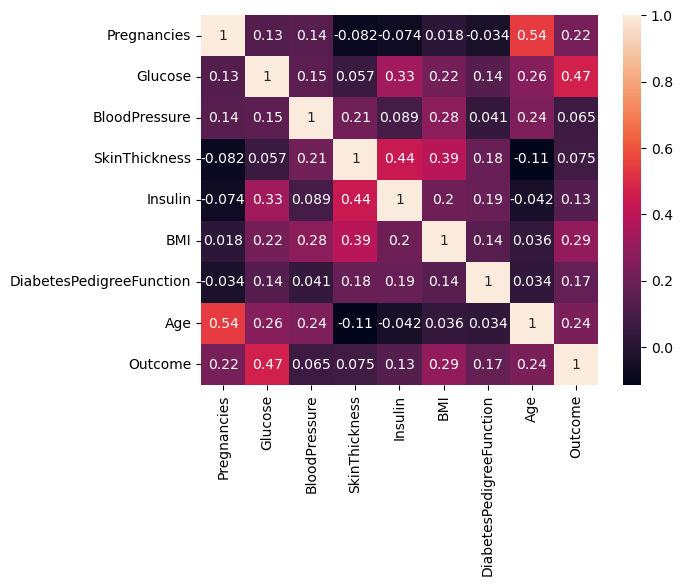

In [11]:
sns.heatmap(df.corr(),annot=True)
# correlation of Glucose w.r.t. outcome is highest in this case which is 0.47 as visible in Heatmap 

2) Data Preprocessing

2.1. Checking any Null or duplicated values in the dataset

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

2.2 Outlier Observation Analysis

In [14]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


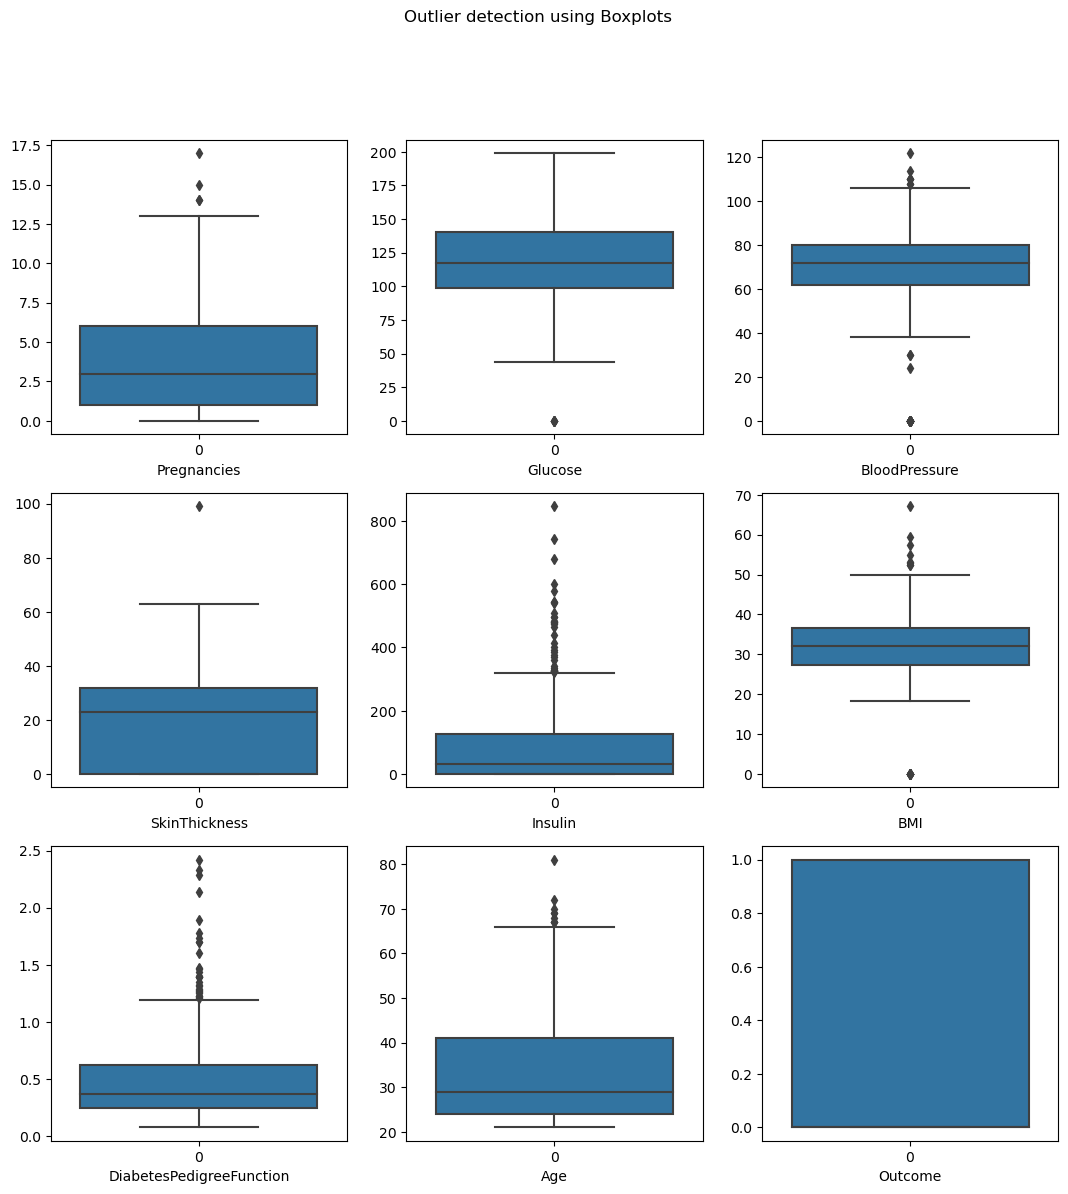

In [15]:
#check outliers in the dataset using box plot
k=1
plt.figure(figsize=(13,13))
for j in df.columns:   
    plt.subplot(3,3,k)
    sns.boxplot(df[j])
    plt.xlabel(j)
    k=k+1
    plt.suptitle('Outlier detection using Boxplots')

2.3. Outlier removal through imputations

In [16]:
#Detect outliers using IQR method and replace them with corresponding boundary values to remove outliers.
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df.loc[df[i] > upper,i] = upper
    df.loc[df[i] < lower,i] = lower

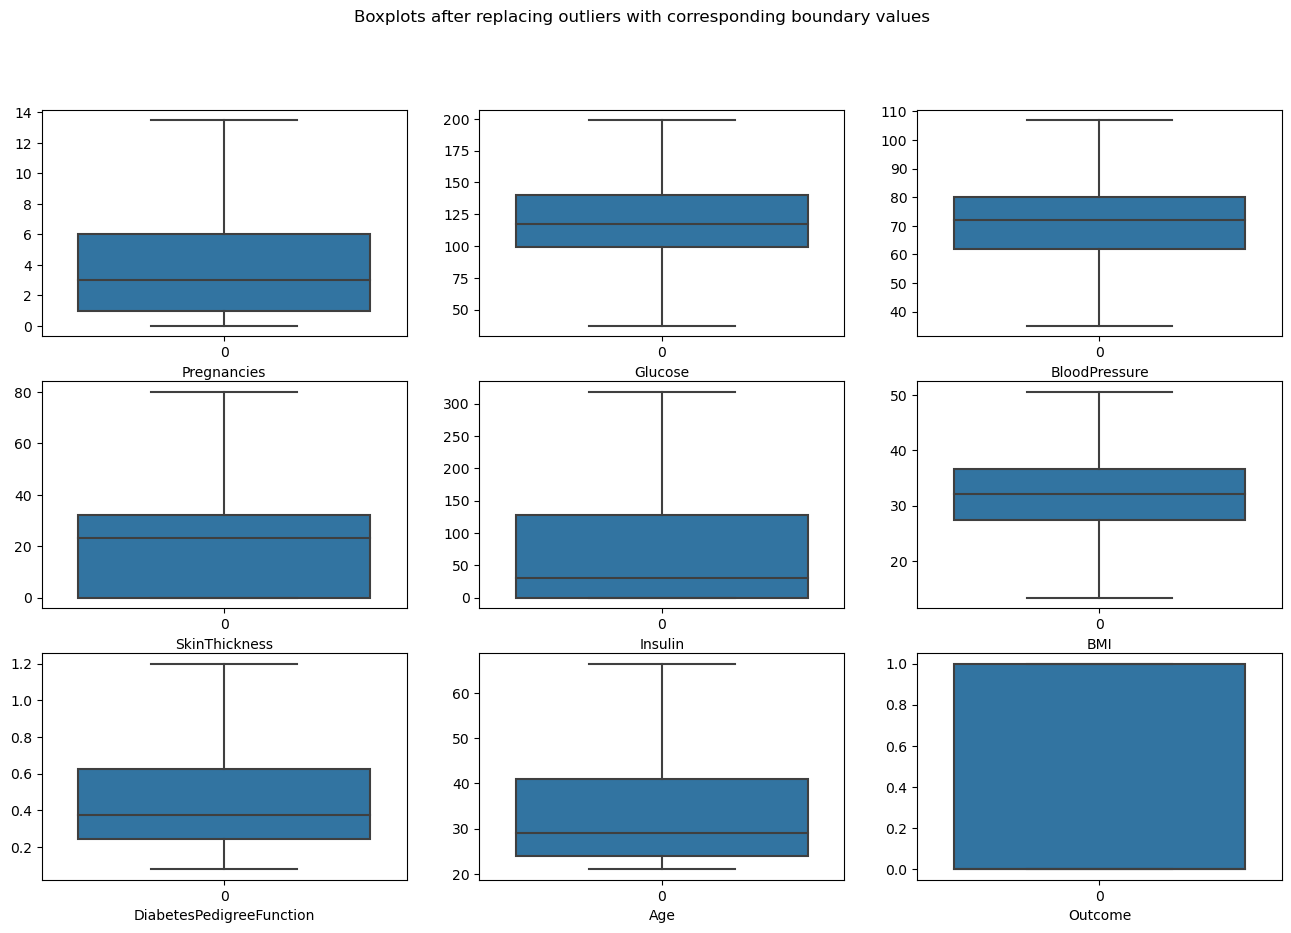

In [17]:
#box plot after imputations:
k=1
plt.figure(figsize=(16,10))
for j in df.columns:   
    plt.subplot(3,3,k)
    sns.boxplot(df[j])
    plt.xlabel(j)
    k=k+1
    plt.suptitle('Boxplots after replacing outliers with corresponding boundary values')

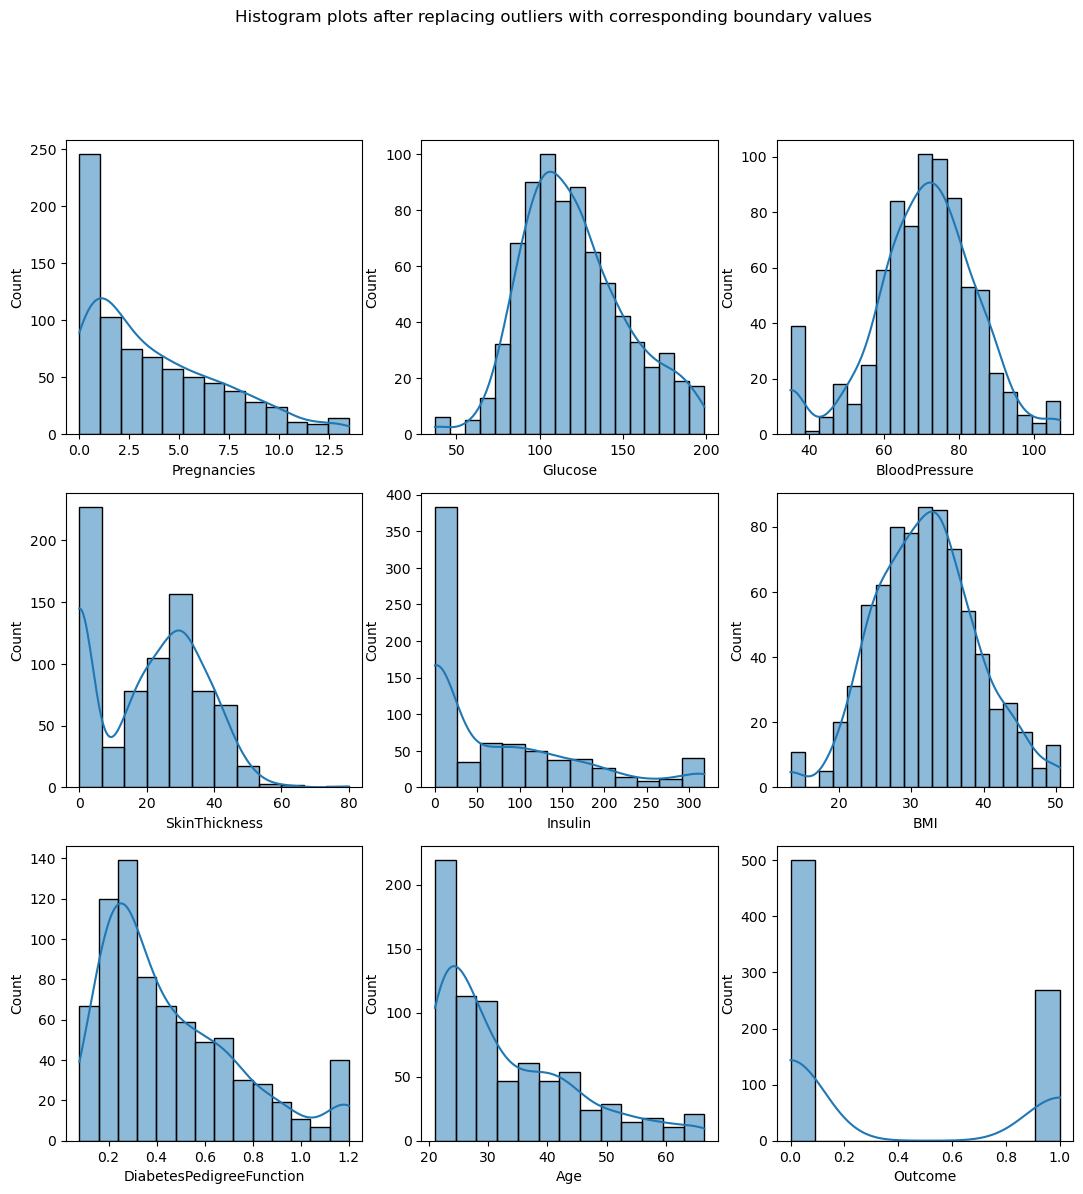

In [18]:
#Histogram plots after imputations
k=1
plt.figure(figsize=(13,13))
for i in df.columns:   
    plt.subplot(3,3,k)
    sns.histplot(df[i],kde=True)
    plt.xlabel(i)
    k=k+1
    plt.suptitle('Histogram plots after replacing outliers with corresponding boundary values')

In [19]:
X=df.drop(['Outcome'], axis=1)
y=df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Base Models


Results for Logistic Regression:
Confusion Matrix:
[[123  28]
 [ 31  49]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       151
         1.0       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



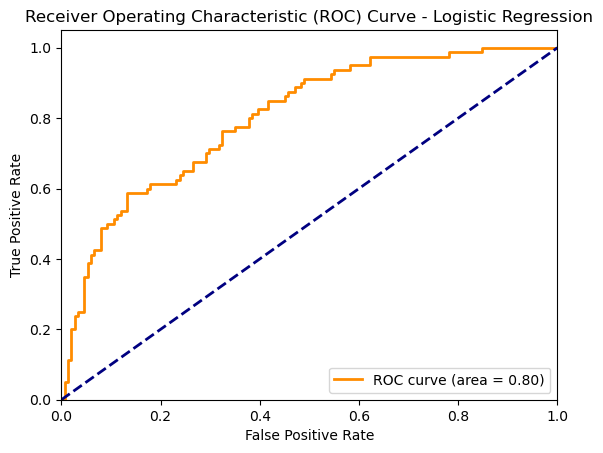


Results for Random Forest:
Confusion Matrix:
[[120  31]
 [ 32  48]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       151
         1.0       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



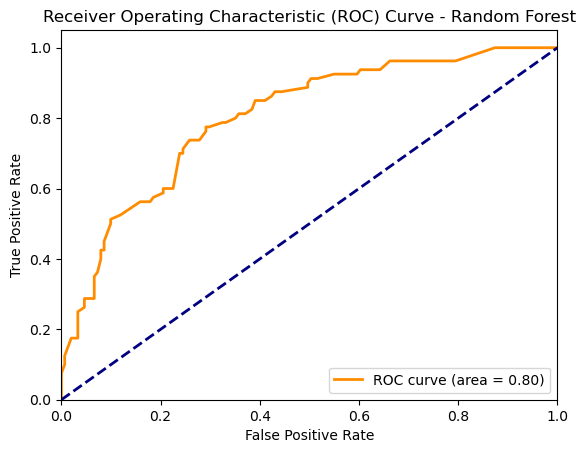


Results for Support Vector Machine:
Confusion Matrix:
[[122  29]
 [ 31  49]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       151
         1.0       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\nResults for {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if name != 'Support Vector Machine':  # SVC does not provide probabilities for roc_curve
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
    
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()